In [837]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import date, timedelta
from matplotlib.pyplot import cm
%matplotlib inline


In [954]:
path = '~/data/ACLED/country-jul23/2017-01-01-2021-07-23-Afghanistan.csv'
# path = '~/data/ACLED/country-jul23/2018-01-01-2021-07-23-Brazil.csv'
# path = '~/data/ACLED/country-jul23/2015-01-01-2021-07-23-Yemen.csv'
# path = '~/data/ACLED/country-jul23/2016-01-01-2021-07-23-Turkey.csv'
# path = '~/data/ACLED/country-jul23/2020-01-01-2021-07-23-United_States.csv'
# path = '~/data/ACLED/country-jul23/2017-01-01-2021-07-23-Syria.csv'
country_name = path.split('-')[7][:-4]
print(country_name,'country_name')
filename = path.split('/')[-1]
print('path',path,'filename',filename)
start_year = int(filename.split('-')[0])
start_month = int(filename.split('-')[1])
start_day = int(filename.split('-')[2])
end_year = int(filename.split('-')[3])
end_month = int(filename.split('-')[4])
end_day = int(filename.split('-')[5])

df = pd.read_csv(path,sep=';')
df = df.drop_duplicates(subset=['data_id'], keep='first')
df['event_date'] = pd.to_datetime(df['event_date'])
print(df.columns)

df[['event_type','sub_event_type']]
# df['time_precision'].unique()
df.sort_values(by=['event_date'],inplace=True ) 
print(df.value_counts('year'))
# print(df['admin1'].unique().shape)


Afghanistan country_name
path ~/data/ACLED/country-jul23/2017-01-01-2021-07-23-Afghanistan.csv filename 2017-01-01-2021-07-23-Afghanistan.csv
Index(['data_id', 'iso', 'event_id_cnty', 'event_id_no_cnty', 'event_date',
       'year', 'time_precision', 'event_type', 'sub_event_type', 'actor1',
       'assoc_actor_1', 'inter1', 'actor2', 'assoc_actor_2', 'inter2',
       'interaction', 'region', 'country', 'admin1', 'admin2', 'admin3',
       'location', 'latitude', 'longitude', 'geo_precision', 'source',
       'source_scale', 'notes', 'fatalities', 'timestamp', 'iso3'],
      dtype='object')
year
2018    14136
2019    13908
2017    13386
2020     7429
2021     6995
dtype: int64


In [955]:
df.head()[['event_date', 'event_type', 'sub_event_type', 'actor1','actor2',
       'assoc_actor_1',  'region', 'country', 'admin1',
       'admin2', 'admin3', 'notes']]

,event_date,event_type,sub_event_type,actor1,actor2,assoc_actor_1,region,country,admin1,admin2,admin3,notes
55853,2017-01-01,Battles,Armed clash,Military Forces of Afghanistan (2014-),Taliban,NaN,Caucasus and Central Asia,Afghanistan,Faryab,Almar,NaN,1 Jan 2017: An Afghan military commander was r...
55827,2017-01-01,Explosions/Remote violence,Remote explosive/landmine/IED,Taliban,Military Forces of Afghanistan (2014-),NaN,Caucasus and Central Asia,Afghanistan,Helmand,Lashkargah,NaN,1 Jan 2017: A government APC was destroyed in ...
55826,2017-01-01,Explosions/Remote violence,Remote explosive/landmine/IED,Taliban,Military Forces of Afghanistan (2014-),NaN,Caucasus and Central Asia,Afghanistan,Farah,Bala Buluk,NaN,1 Jan 2017: an unknown number of Afghan securi...
55825,2017-01-01,Battles,Armed clash,Taliban,Military Forces of Afghanistan (2014-),NaN,Caucasus and Central Asia,Afghanistan,Wardak,Sayyid Abad,NaN,1 Jan 2017: An Afghan soldier was reportedly k...
55824,2017-01-01,Battles,Armed clash,Taliban,Military Forces of Afghanistan (2014-),NaN,Caucasus and Central Asia,Afghanistan,Nimruz,Khashrod,NaN,1 Jan 2017: An unknown number of Afghan securi...


In [956]:
event_type_column = 'sub_event_type'
# event_type_column = 'event_type'
delta_value = 1
if delta_value == 1:
    level = 'day'
elif delta_value == 7:
    level = 'week'
elif delta_value == 14:
    level = 'biweek'
elif delta_value == 30:
    level = 'month'
subevents = df[event_type_column].unique()
print(len(subevents),subevents)
subevent_count_dict = {}
start_date = date(start_year, start_month, start_day)
end_date = date(end_year, end_month, end_day)
delta = timedelta(days=delta_value)
n_days = 0
last_date = start_date - delta
while start_date <= end_date:
#     print('last_date',last_date,'start_date',start_date )
    last_date = start_date
    start_date += delta
    n_days += 1
print('n_days =',n_days)
for v in subevents:
    subevent_count_dict[v] = np.array([0 for i in range(n_days)])


24 ['Armed clash' 'Remote explosive/landmine/IED'
 'Non-state actor overtakes territory' 'Shelling/artillery/missile attack'
 'Attack' 'Air/drone strike' 'Peaceful protest'
 'Abduction/forced disappearance' 'Government regains territory'
 'Disrupted weapons use' 'Change to group/activity' 'Mob violence'
 'Suicide bomb' 'Non-violent transfer of territory'
 'Protest with intervention' 'Looting/property destruction' 'Arrests'
 'Sexual violence' 'Headquarters or base established' 'Grenade'
 'Violent demonstration' 'Agreement' 'Excessive force against protesters'
 'Other']
n_days = 1665


In [957]:
start_date = date(start_year, start_month, start_day)
end_date = date(end_year, end_month, end_day)
delta = timedelta(days=delta_value)
day_i = 0
last_date = start_date - delta
# print('last_date',last_date,'start_date',start_date,'end_date',end_date)
while start_date <= end_date:
    last_date_str = last_date.strftime("%Y-%m-%d") #("%d %B %Y")
    date_str = start_date.strftime("%Y-%m-%d")
    df_day = df.loc[(df['event_date'] > last_date_str) & (df['event_date'] <= date_str)]
    if day_i%300==0:
        print('#',len(df_day),len(df))
#         print(df_day['sub_event_type'] )
    df_count = df_day[event_type_column].value_counts().rename_axis('unique_values').reset_index(name='counts')
#     print('df_count',df_count)
    for i,row in df_count.iterrows():
        subevent_count_dict[row['unique_values']][day_i] = row['counts']
    last_date = start_date
    start_date += delta
    day_i += 1
print('day_i =',day_i)

# 46 55854
# 39 55854
# 27 55854
# 41 55854
# 14 55854
# 33 55854
day_i = 1665


In [958]:
orig = subevent_count_dict
# for k in subevent_count_dict:
#     subevent_count_dict[k] = subevent_count_dict[k]/(subevent_count_dict[k].sum())
    
# for k in subevent_count_dict:
#     if k == 'Battles':
#         subevent_count_dict[k] = subevent_count_dict[k] - 5
subevent_count_dict = orig

# def movingaverage(interval, window_size):
#     window = np.ones(int(window_size))/float(window_size)
#     return np.convolve(interval, window, 'same')

def movingaverage(a, n=3) :
    padding = []
    for i in range(n-1):
        padding.append(a[:i+1].mean())
    padding = np.array(padding)
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return np.concatenate((padding, ret[n - 1:] / n),0)

# ma = movingaverage(subevent_count_dict[subevents[0]],7)
# ma.shape,subevent_count_dict[subevents[0]].shape
# set(subevent_count_dict['Protest with intervention'])

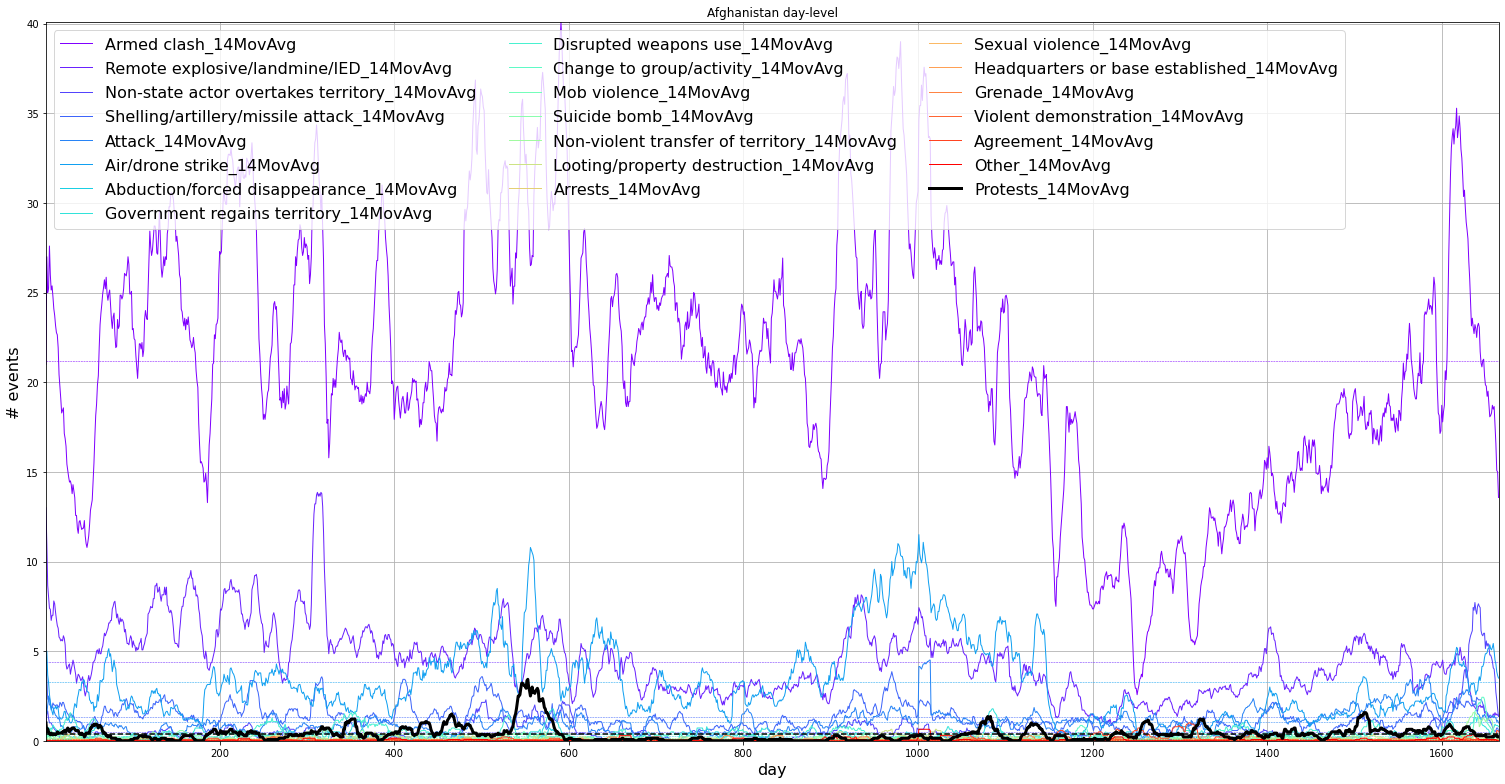

In [959]:
# Fixing random state for reproducibility

t = np.arange(1, day_i+1, 1) 
color=cm.rainbow(np.linspace(0,1,len(subevents)))

fig, axs = plt.subplots(1, 1,figsize=(22, 11))
event_set_protest = ['Protest with intervention','Excessive force against protesters','Peaceful protest']
event_set = ['Battles', 'Explosions/Remote violence', 'Strategic developments','Violence against civilians', 'Protests', 'Riots']
# event_set = ['Battles', 'Explosions/Remote violence', 'Strategic developments','Violence against civilians', 'Riots']
event_set = [  'Strategic developments','Violence against civilians', 'Protests', 'Riots']

# event_set = ['Violence against civilians', 'Protests', 'Riots']
# event_set = [  'Explosions/Remote violence']
# color2 = ['#080808','#333030','#6e6a6a']
subevent_count_dict['Protests'] = subevent_count_dict['Protest with intervention'] + subevent_count_dict['Peaceful protest'] + subevent_count_dict['Excessive force against protesters']
subevents = df[event_type_column].unique()
subevents = np.append(subevents, 'Protests')
for i in range(len(subevents)):
#     print(subevents[i])
#     if subevents[i] in event_set or True :
    if subevents[i] not in event_set_protest: #and subevents[i] not in ['Protests'] :
#         continue
        length = day_i
        cur_t = t[:length]
        ma_day = 14
        count_data = subevent_count_dict[subevents[i]][:length]
#         axs.plot(cur_t, count_data, 'o',label=subevents[i])
        ma = movingaverage(count_data,ma_day)
        cur_label = subevents[i]+'_'+str(ma_day)+'MovAvg'
        if ma_day == 1:
            cur_label = subevents[i]
        if subevents[i] in ['Protests']:
#             axs.plot(t[:], ma, '-',label=cur_label,color=color[i],linewidth=4)
#             axs.axhline(y=count_data.mean(), color=color[i],  linestyle='--',linewidth=4)
            axs.plot(cur_t, ma, '-',label=cur_label,color='black',linewidth=3)
            axs.axhline(y=count_data.mean(), color='black',  linestyle='--',linewidth=1.5)
        else:
            axs.plot(cur_t, ma, '-',label=cur_label,color=color[i],linewidth=1)
            axs.axhline(y=count_data.mean(), color=color[i],  linestyle='--',linewidth=0.5)
# axs.plot(t, s1, t, s2)
# axs.set_xlim(0, 2)

axs.set_xlabel(level,fontsize=16)
axs.set_ylabel('# events',fontsize=16)
axs.grid(True)
axs.legend(prop={'size': 16},ncol=3)
# cxy, f = axs[1].cohere(s1, s2, 256, 1. / dt)
# axs[1].set_ylabel('coherence')
axs.margins(0.0)
axs.set_title('{} {}-level'.format(country_name,level))
# axs.set_title('Yemen week-level')

fig.tight_layout()
plt.show()
fig.savefig('time_series/{}_{}_sub.pdf'.format(country_name,level), bbox_inches='tight')


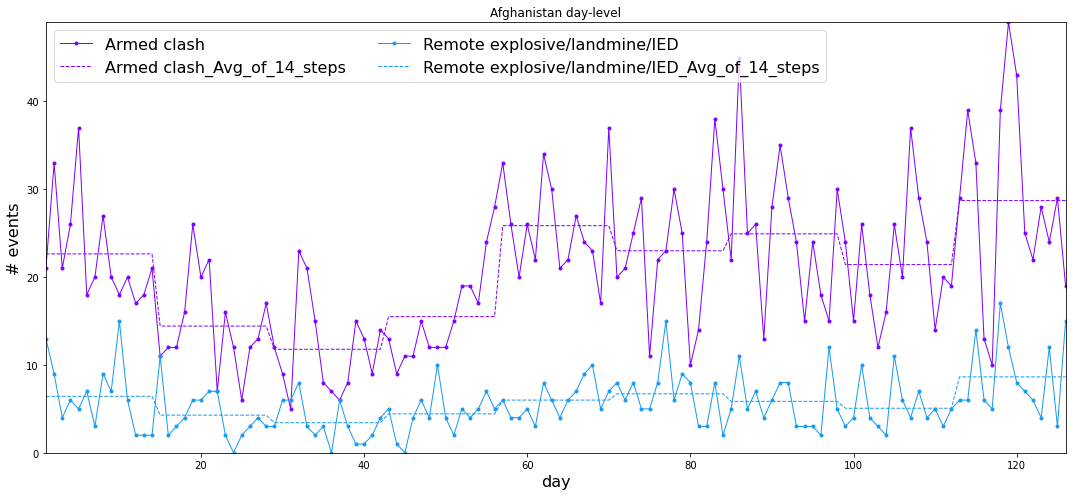

In [973]:
# check moving average
def get_avg(x,day=7):
    r = []
    for i in range(0,len(x),day):
        avg = x[i:i+day].mean()
        r += [avg for i in range(day)]
    r = np.array(r)
#     print(r)
    return r


t = np.arange(1, day_i+1, 1) 
color=cm.rainbow(np.linspace(0,1,len(subevents)))

fig, axs = plt.subplots(1, 1,figsize=(15, 7))
event_set_protest = ['Protest with intervention','Excessive force against protesters','Peaceful protest']
event_set = ['Battles', 'Explosions/Remote violence', 'Strategic developments','Violence against civilians', 'Protests', 'Riots']
# event_set = ['Battles', 'Explosions/Remote violence', 'Strategic developments','Violence against civilians', 'Riots']
event_set = [  'Strategic developments','Violence against civilians', 'Protests', 'Riots']

# event_set = ['Violence against civilians', 'Protests', 'Riots']
# event_set = [  'Explosions/Remote violence']
# color2 = ['#080808','#333030','#6e6a6a']
for i in range(len(subevents)):
#     print(subevents[i])
    if  i < 2:
#     if subevents[i] in ['Battles','Explosions/Remote violence'] :
#         axs.plot(t, subevent_count_dict[subevents[i]], 's',label=subevents[i])
        ma_day = 1
        count_data = subevent_count_dict[subevents[i]][:126]
        ma = movingaverage(count_data,ma_day)
        cur_label = subevents[i]+'_'+str(ma_day)+'MovAvg'
        if ma_day == 1:
            cur_label = subevents[i]
         
        axs.plot(t[:126], ma, '.-',label=cur_label,color=color[i*5],linewidth=1)
        avg_data = get_avg(count_data,day=14)
        axs.plot(t[:126],avg_data, color=color[i*5],  linestyle='--',label=subevents[i]+'_'+'Avg_of_14_steps',linewidth=1)
#         axs.axhline(y=count_data.mean(), color=color[i],  linestyle='--')
         

axs.set_xlabel(level,fontsize=16)
axs.set_ylabel('# events',fontsize=16)
# axs.grid(True)
axs.legend(prop={'size': 16},ncol=2)
axs.margins(0.0)
axs.set_title('{} {}-level'.format(country_name,level))

fig.tight_layout()
plt.show()
fig.savefig('time_series/{}_{}_sub_eg.pdf'.format(country_name,level), bbox_inches='tight')
